In [24]:
import pandas as pd
import codecs
import json
from pandas.io.json import json_normalize

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
#Machine learning libraries for Text analysis
import nltk  # machine learning with text
from nltk import download as nltk_download
from nltk.corpus import stopwords, wordnet  # List of common words
from nltk.tokenize import word_tokenize  # Split text into significant forms
from nltk.stem import WordNetLemmatizer  # Reduce words to their root form
from nltk import pos_tag  # Tag words with parts of speech
from collections import defaultdict  # Dictionaries that have a backup value
from sklearn.feature_extraction.text import CountVectorizer  # Convert text to sparse matrices
from textblob import TextBlob  # Sentiment analysis
from gensim.models.ldamodel import LdaModel  # Topic extraction
from gensim.models.phrases import Phrases  # ngrams
from gensim import corpora  # Vectorization
import pyLDAvis
from wordcloud import WordCloud  # Create wordclouds
import matplotlib.pylab as plt

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
from lyricsgenius import Genius

genius = Genius('JOSfSO0Cn0Y3avlw_ItRLdmwFj3s-36fjS-POUolMGFiWkUiE_zHXfQZVsOOqbxA')
artist = genius.search_artist("Travis Scott", max_songs=200)
travis_json = artist.save_lyrics()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Searching for songs by Travis Scott...

Song 1: "SICKO MODE"
Song 2: "​goosebumps"
Song 3: "BUTTERFLY EFFECT"
Song 4: "HIGHEST IN THE ROOM"
Song 5: "Antidote"
Song 6: "​beibs in the trap"
Song 7: "STARGAZING"
Song 8: "YOSEMITE"
Song 9: "CAN’T SAY"
Song 10: "90210"

Reached user-specified song limit (10).
Done. Found 10 songs.
Lyrics_TravisScott.json already exists. Overwrite?
(y/n): y
Wrote Lyrics_TravisScott.json.


In [27]:
#travis = pd.read_json('Lyrics_travisEilish.json', orient='index')
#travis = pd.read_json(codecs.open('Lyrics_travisEilish.json','r','utf-8'))
#df = json.loads('Lyrics_travisEilish.json').text
#df = pd.DataFrame.from_dict('Lyrics_travisEilish.json', orient='index')
with open('Lyrics_TravisScott.json') as json_data:
    data = json.load(json_data)

df = pd.DataFrame(data['songs'])
travis_df = df[['full_title', 'artist', 'lyrics']]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
travis_df.lyrics[1]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"[Intro: Travis Scott]\nYeah\n7:30 in the night, yeah\nOoh-oooh, ooh\n\n[Chorus: Travis Scott]\nI get those goosebumps every time, yeah, you come around, yeah\nYou ease my mind, you make everything feel fine\nWorried 'bout those comments\nI'm way too numb, yeah, it's way too dumb, yeah\nI get those goosebumps every time, I need the Heimlich\nThrow that to the side, yeah\nI get those goosebumps every time, yeah\nWhen you're not around (Straight up)\nWhen you throw that to the side, yeah (It's lit)\nI get those goosebumps every time, yeah\n\n[Verse 1: Travis Scott]\n7-1-3\nThrough the 2-8-1, yeah, I'm ridin', why they on me?\nWhy they on me? I'm flyin', sippin' low-key\nI'm sippin' low-key in Onyx, rider, rider\nWhen I'm pullin' up right beside ya\nPop star, lil' Mariah\nWhen I text a cute game, wildness\nThrow a stack on the Bible\nNever Snapchat or took molly\nShe fall through plenty, her and all her ginnies, yeah\nWe at the top floor, right there off Doheny, yeah\nOh no, I can't fuck 

# Lyric Analysis

## Cleaning the lyrics

In [29]:
travis_df.dtypes

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


full_title    object
artist        object
lyrics        object
dtype: object

In [30]:
travis_df.lyrics = travis_df.lyrics.str.lower()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
# Remove quotes
travis_df.lyrics = travis_df.lyrics.replace(to_replace="(\u2019)", value="'", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
travis_df.lyrics = travis_df.lyrics.replace(to_replace="won’t", value="will not", regex=True)
travis_df.lyrics = travis_df.lyrics.replace(to_replace="can’t", value="can not", regex=True)
travis_df.lyrics = travis_df.lyrics.replace(to_replace="wanna", value="want to", regex=True)
travis_df.lyrics = travis_df.lyrics.replace(to_replace="n't", value=" not", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
travis_df.lyrics = travis_df.lyrics.replace(to_replace="it's", value="it is", regex=True)
travis_df.lyrics = travis_df.lyrics.replace(to_replace="i've", value="i have", regex=True)
travis_df.lyrics = travis_df.lyrics.replace(to_replace="i'm", value="i am", regex=True)
travis_df.lyrics = travis_df.lyrics.replace(to_replace="n' ", value="ng ", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# remove "[verse ..]" and "[chorus]"
travis_df.lyrics = travis_df.lyrics.replace(to_replace=r"\[verse \d\]", value="", regex=True)
travis_df.lyrics = travis_df.lyrics.replace(to_replace=r"\[chorus\]", value="", regex=True)
travis_df.lyrics = travis_df.lyrics.replace(to_replace=r"\[bridge\]", value="", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
travis_df.lyrics = travis_df.lyrics.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=" ", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
travis_df.lyrics = travis_df.lyrics.replace(to_replace=r"\[chorus\]", value="", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
travis_df.lyrics = travis_df.lyrics.replace(to_replace=r"\W", value=" ", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
# Remove common words from English lyrics 

travis_df.lyrics = travis_df.lyrics.apply(word_tokenize)
stop_words = stopwords.words("english")
travis_df.lyrics = travis_df.lyrics.apply(lambda x: [y for y in x if y not in stop_words
                                                              and len(y) > 2])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
travis_df.lyrics[1]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['intro',
 'travis',
 'scott',
 'yeah',
 'night',
 'yeah',
 'ooh',
 'oooh',
 'ooh',
 'chorus',
 'travis',
 'scott',
 'get',
 'goosebumps',
 'every',
 'time',
 'yeah',
 'come',
 'around',
 'yeah',
 'ease',
 'mind',
 'make',
 'everything',
 'feel',
 'fine',
 'worried',
 'bout',
 'comments',
 'way',
 'numb',
 'yeah',
 'way',
 'dumb',
 'yeah',
 'get',
 'goosebumps',
 'every',
 'time',
 'need',
 'heimlich',
 'throw',
 'side',
 'yeah',
 'get',
 'goosebumps',
 'every',
 'time',
 'yeah',
 'around',
 'straight',
 'throw',
 'side',
 'yeah',
 'lit',
 'get',
 'goosebumps',
 'every',
 'time',
 'yeah',
 'verse',
 'travis',
 'scott',
 'yeah',
 'ridin',
 'flyin',
 'sipping',
 'low',
 'key',
 'sipping',
 'low',
 'key',
 'onyx',
 'rider',
 'rider',
 'pulling',
 'right',
 'beside',
 'pop',
 'star',
 'lil',
 'mariah',
 'text',
 'cute',
 'game',
 'wildness',
 'throw',
 'stack',
 'bible',
 'never',
 'snapchat',
 'took',
 'molly',
 'fall',
 'plenty',
 'ginnies',
 'yeah',
 'top',
 'floor',
 'right',
 'doheny'

In [40]:
lemma = WordNetLemmatizer()

# Dictionary to convert between part-of-speech tags and the ones the lemmatizer understands

tag_dict = defaultdict(lambda : wordnet.NOUN)
tag_dict['J'] = wordnet.ADJ
tag_dict['V'] = wordnet.VERB
tag_dict['R'] = wordnet.ADV

# function to lemmatize a sentence

def get_lemma(word):
    """Gets the POS tag for a word, and then returns the lemmatized form of the word"""
    tag = pos_tag([word])[0][1][0]
    tag = tag_dict[tag]
    
    return lemma.lemmatize(word, tag)

# Perform the lemmatization
travis_df.lyrics = travis_df.lyrics.apply(lambda x: [get_lemma(word) for word in x])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
# Create the list of words and their frequency (corpus)
from gensim import corpora
pyLDAvis.enable_notebook()
dictionary = corpora.Dictionary(travis_df.lyrics )
corpus = [dictionary.doc2bow(text) for text in travis_df.lyrics ]

import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
import gensim
NUM_TOPICS = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.038*"get" + 0.034*"mmm" + 0.031*"ooh" + 0.024*"night" + 0.021*"show" + 0.020*"yeah"')
(1, '0.029*"yeah" + 0.027*"get" + 0.022*"pop" + 0.019*"cane" + 0.015*"dip" + 0.014*"change"')
(2, '0.060*"yeah" + 0.024*"get" + 0.015*"ooh" + 0.014*"like" + 0.014*"say" + 0.014*"want"')


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(lda_display)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Wordcloud

In [44]:
travis_df.lyrics = travis_df.lyrics.apply(lambda x: " ".join(x))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [45]:
# Create an object that converts strings into a sparse matrix
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features= 20000 , min_df=0.01, ngram_range= (1,1))

# Convert the text column to a sparse matrix

data_dtm = vectorizer.fit_transform(travis_df.lyrics)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
# Create a dataframe of terms and frequencies
# Get the frequency of each term

term_frequencies = data_dtm.sum(axis=0)

# Match frequencies to terms

frequent_terms = [(word, term_frequencies[0, id]) for word, id in vectorizer.vocabulary_.items()]

# Convert the word-frequency pairings to a dataframe

term_df = pd.DataFrame(columns=["term","frequency"], data=frequent_terms)

# Sort the dataframe

term_df.sort_values(by="frequency", ascending=False, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


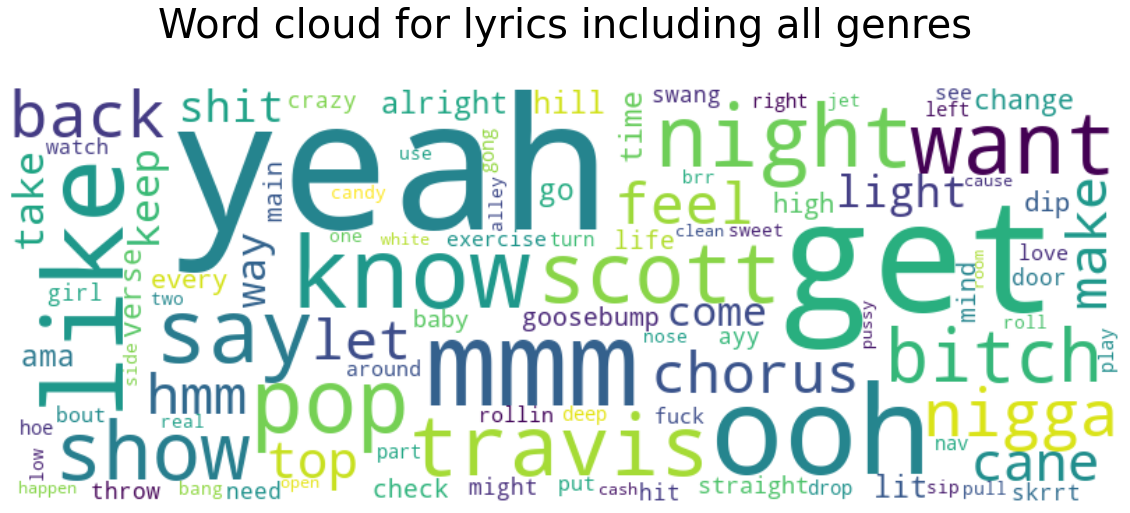

In [49]:
# Create a dictionary of most frequent terms ((required for word clouds)

term_dict = term_df.set_index('term')['frequency'].to_dict()

# Create a wordcloud of most frequent terms

wc = WordCloud(width=800, height=300, background_color="white",
               max_words=100)

wc.generate_from_frequencies(term_dict)

# Display the cloud

plt.figure(figsize=(20, 10))
plt.title("Word cloud for lyrics including all genres", fontsize = 40, pad = 50 )
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()